# History of the NALCS
## Exploring NALCS data Pre-Franchising

Hello! Over the next couple of days I will be adding on to this Jupyter Noteboook and perform a light analysis on all things NALCS before franchising took place in 2013. All data has been webscraped from [Leaguepedia](https://lol.gamepedia.com/League_of_Legends_Esports_Wiki). To give some insight on integrity of the site, all games have their sources cited with the exact match page within league of legends website. Here is an example from the [2015 North American Summer Challenger Series](https://matchhistory.na.leagueoflegends.com/en/#match-details/FRA1TMNT1/700174?gameHash=473376a14662e0af&tab=overview). I simply found it easier to parse through Leaguepedia than go through every match history page.

Now with all that being said, let's get started! First we will look at historical Elo of all teams to officially settle the debate once and for all: Which team was the all time best team in NA history?

### Who is the best team of them all?
First thing we need to do is format our dataset to work well with the ELOTools file that @ccastle has created

In [14]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import pygal

#created by @ccastle.
from ELOTools import *

history = pd.read_excel("NALCS_History.xlsx")
history.head(7)



,Date,Patch,Blue,Red,Winner,Loser,Blue_Bans,Red_Bans,Blue_Picks,Red_Picks,...,Red_Barons,Red_RiftHerald,Diff_Gold,Diff_Kills,Diff_Towers,Diff_Dragons,Diff_Barons,Diff_RiftHerald,Tournament,Match of the Season
0,2013-04-20,NaN,Team Vulcun,Team Curse,blue,NaN,"Miss Fortune, Volibear, Kassadin","Shen, Thresh, Renekton","Zed, Xerath, Draven, Udyr, Sona","Nunu, Fizz, Tristana, Ezreal, Elise",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-LCS-2013-Spring,112
1,2013-04-20,NaN,compLexity Gaming,Team MRN,red,NaN,"Renekton, Malphite, Jarvan IV","Kha'Zix, Zed, Amumu","Jayce, Nasus, Gragas, Caitlyn, Thresh","Riven, Shen, Twisted Fate, Twitch, Sona",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-LCS-2013-Spring,111
2,2013-04-20,NaN,Team Dignitas,Team SoloMid,red,NaN,"Thresh, Malphite, Karthus","Gragas, Diana, Shen","Zed, Nasus, Katarina, Draven, Alistar","Renekton, Cho'Gath, Twisted Fate, Miss Fortune...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-LCS-2013-Spring,110
3,2013-04-20,NaN,Good Game University,Counter Logic Gaming,blue,NaN,"Malphite, Cho'Gath, Shen","Twitch, Karthus, Thresh","Jayce, Elise, Ryze, Tristana, Yorick","Udyr, Jarvan IV, Orianna, Ezreal, Lulu",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-LCS-2013-Spring,109
4,2013-04-19,NaN,Team Dignitas,Team Vulcun,red,NaN,"Jarvan IV, Karthus, Thresh","Diana, Caitlyn, Shen","Renekton, Volibear, Gragas, Draven, Alistar","Malphite, Nasus, Cassiopeia, Tristana, Sona",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-LCS-2013-Spring,108
5,2013-04-19,NaN,Team SoloMid,Good Game University,blue,NaN,"Riven, Elise, Thresh","Renekton, Draven","Shen, Nocturne, Karthus, Varus, Sona","Jayce, Nasus, Lux, Caitlyn, Janna",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-LCS-2013-Spring,107
6,2013-04-19,NaN,Team Curse,compLexity Gaming,red,NaN,"Zed, Jayce, Shen","Volibear, Thresh, Jarvan IV","Gragas, Udyr, Twisted Fate, Caitlyn, Lulu","Darius, Amumu, Kha'Zix, Miss Fortune, Kayle",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA-LCS-2013-Spring,106


The only columns we are going to need are Date, Match of the Day (or in our case match of the season), Team A (Blue), Team B(Red), Winner

We are also going to add other columns to break down the data set a little bit more (such as patch)

In [15]:
my_elo_df = history[['Date', 'Match of the Season','Blue', 'Red', 'Winner' ]]

#change columns to fit the ELO tools file
my_elo_df.columns = ['Date', 'Match of the Day','Team A', 'Team B', 'Winner']

for i,k in my_elo_df.iterrows():
    if my_elo_df.loc[i,'Winner'] == 'blue':
        my_elo_df.set_value(i,'Winner', 'Team A')
    elif my_elo_df.loc[i,'Winner'] == 'red':
        my_elo_df.set_value(i,'Winner','Team B')
        


Now that we have our dataframe all cleaned up, we can run compute_elo_table located in the ELO Tools file!

In [16]:
final_elo = compute_elo_table(my_elo_df)
final_elo.head(7)


,Date,Elo,Match Number,Team
0,2013-02-06,1000.0,0,Curse Academy
1,2013-02-06,1000.0,0,Denial eSports.East
2,2013-02-06,1000.0,0,Rock Bottom Gorillas
3,2013-02-06,1000.0,0,Team Tempest
4,2013-02-06,1000.0,0,Cloud9 Tempest
5,2013-02-06,1000.0,0,NRG Esports
6,2013-02-06,1000.0,0,Apex Gaming


Now let's join the elo table with the main table to get a full picture of Elo and more granular metrics on how the team performed

In [17]:
#join elo table with main table
teama_merge = my_elo_df.merge(final_elo, how='left', left_on=['Date', 'Team A'], right_on=['Date', 'Team'])

teama_merge[teama_merge['Team A'] == 'Cloud9'].tail(7)

,Date,Match of the Day,Team A,Team B,Winner,Elo,Match Number,Team
4775,2017-09-10,10,Cloud9,Counter Logic Gaming,Team B,1191.918134,352,Cloud9
4776,2017-09-10,10,Cloud9,Counter Logic Gaming,Team B,1179.888678,353,Cloud9
4777,2017-09-10,10,Cloud9,Counter Logic Gaming,Team B,1188.531546,354,Cloud9
4782,2017-09-10,8,Cloud9,Counter Logic Gaming,Team A,1183.477451,351,Cloud9
4783,2017-09-10,8,Cloud9,Counter Logic Gaming,Team A,1191.918134,352,Cloud9
4784,2017-09-10,8,Cloud9,Counter Logic Gaming,Team A,1179.888678,353,Cloud9
4785,2017-09-10,8,Cloud9,Counter Logic Gaming,Team A,1188.531546,354,Cloud9


109


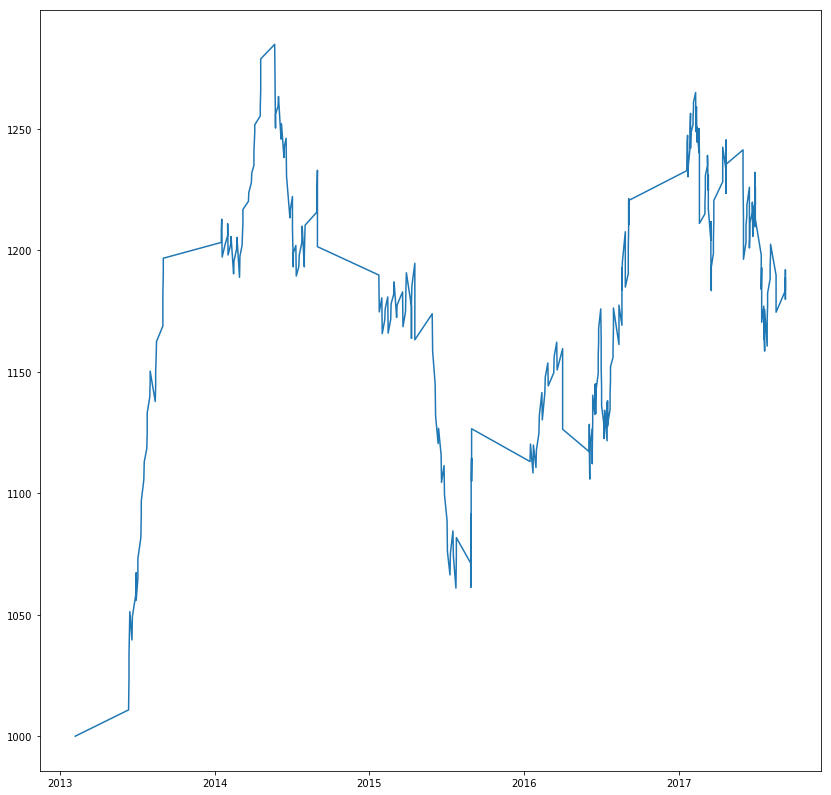

In [18]:
team_list = list(final_elo['Team'].unique())
print(len(team_list))


fig = plt.figure(figsize=(14,14))
plt.plot(pd.to_datetime(final_elo[final_elo['Team'] == 'Cloud9']['Date']).interpolate(method='time'), final_elo[final_elo['Team'] == 'Cloud9']['Elo'].interpolate(method='cubic') )

#for all teams
#for team in team_list:
#    plt.plot(pd.to_datetime(final_elo[final_elo['Team'] == team]['Date']).interpolate(method='time'), final_elo[final_elo['Team'] == team]['Elo'].interpolate(method='cubic') )
#fig.autofmt_xdate()
plt.show()